# 1. Introduction 👋
<center><img src="https://images.unsplash.com/photo-1607619056574-7b8d3ee536b2?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1240&q=80" alt="Drug Picture" width="700" height="700"></center><br>

## Data Set Problems 🤔
👉 This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order **Financial-Analytics-data to state of Market** that might be suitable for the patient.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Dataset exploration using various types of data visualization.
*   Build various ML models that can predict drug type.

👨‍💻 **The machine learning models used in this project are:** 
1. Linear Logistic Regression
2. Linear Support Vector Machine (SVM)
3. K Neighbours
4. Decision Tree
5. Random Forest


---

## Data Set Description 🧾

👉 There are **6 variables** in this data set:
*   **3 categorical** variables,and
*   **2 numerical** variables.

<br>



# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [257]:
df_drug = pd.read_csv("Headache.csv")

👉 Read the first 6 rows in the dataset.

In [216]:
df_drug.head()

Unnamed: 0     type treatment    u1   du1    u2   du2
0           1  Migrane        T3  2.34  5.30  5.80  8.52
1           2  Migrane        T1  2.73  6.85  4.68  6.68
2           3  Tension        T1  0.37  0.53  0.55  0.84
3           4  Migrane        T3  7.50  9.12  5.70  7.88
4           5  Migrane        T3  4.63  7.21  5.63  6.75

👉 Data type and checking null in dataset.

In [217]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  98 non-null     int64  
 1   type        98 non-null     object 
 2   treatment   98 non-null     object 
 3   u1          98 non-null     float64
 4   du1         98 non-null     float64
 5   u2          98 non-null     float64
 6   du2         98 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB
None


In [218]:
df_drug.isna().sum()

Unnamed: 0    0
type          0
treatment     0
u1            0
du1           0
u2            0
du2           0
dtype: int64

👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

In [219]:
df_drug.type.value_counts()

Tension    52
Migrane    46
Name: type, dtype: int64

👉 It can be seen that from results above, DrugY has more amount than other types of drugs

In [220]:
df_drug.treatment.value_counts()

T3         28
T1         25
Control    23
T2         22
Name: treatment, dtype: int64

👉 The distribution of patient gender is balanced.

In [221]:
df_drug.u1.value_counts()

1.85     4
2.19     2
1.51     2
0.87     2
1.56     2
        ..
15.10    1
1.12     1
1.33     1
2.43     1
1.50     1
Name: u1, Length: 86, dtype: int64

👉 The distribution of blood pressure level is balanced.

In [222]:
df_drug.du1.value_counts()

3.94    2
9.90    2
3.30    2
4.40    2
3.25    2
       ..
5.94    1
2.33    1
2.80    1
1.65    1
7.21    1
Name: du1, Length: 91, dtype: int64

In [223]:
df_drug.u2.value_counts()

2.00    4
1.20    3
1.75    3
0.88    2
3.27    2
       ..
2.80    1
0.95    1
2.44    1
1.78    1
1.40    1
Name: u2, Length: 85, dtype: int64

In [224]:
df_drug.du2.value_counts()

2.30    2
4.80    2
3.15    2
2.11    2
7.51    2
       ..
3.47    1
0.95    1
8.64    1
5.42    1
3.92    1
Name: du2, Length: 90, dtype: int64

👉 The distribution of cholesterol level is balanced.

## 4.2 Numerical Variables 🔢
👉 This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [225]:
df_drug.describe()

Unnamed: 0         u1        du1         u2        du2
count   98.000000  98.000000  98.000000  98.000000  98.000000
mean    49.500000   3.066020   5.522245   3.532245   5.549184
std     28.434134   2.779509   4.235412   3.158358   4.200130
min      1.000000   0.370000   0.530000   0.220000   0.390000
25%     25.250000   1.502500   2.652500   1.377500   2.590000
50%     49.500000   2.195000   4.325000   2.330000   4.050000
75%     73.750000   3.560000   7.120000   4.612500   7.462500
max     98.000000  15.100000  17.000000  15.500000  16.870000

In [226]:
# 1. Handle Missing Values
# For categorical columns, fill with mode
for column in ['type', 'treatment',]:
    mode_val = df_drug[column].mode()[0]
    df_drug[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['u1', 'du1','u2','du2']:
    median_val = df_drug[column].median()
    df_drug[column].fillna(median_val, inplace=True)

check double values

In [227]:
df_drug.duplicated().sum()

0

In [228]:
df_drug.drop_duplicates(inplace=True)


C:\Users\ZBook\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


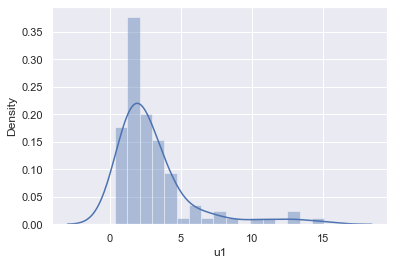

In [229]:
sns.distplot(df_drug['u1']);

C:\Users\ZBook\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


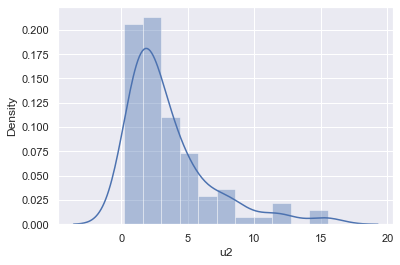

In [230]:
sns.distplot(df_drug['u2']);

C:\Users\ZBook\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


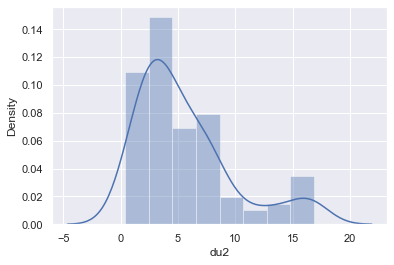

In [231]:
sns.distplot(df_drug['du2']);

C:\Users\ZBook\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


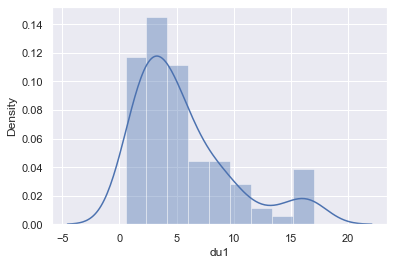

In [232]:
sns.distplot(df_drug['du1']);

👉The distribution of **'Mar_Cap_Crore'** column is **symetric**, since the skewness value  between 5000 and 27500 <br>
👉The distribution of **'Sales_Qtr_Crore'** column is **moderately skewed**, since the skewness value is ***between 0 and 100000***. It can also be seen from the histogram for '' column

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

## 5.1market Type Distribution 💊

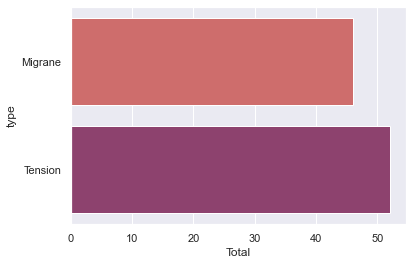

In [233]:
sns.set_theme(style="darkgrid")
sns.countplot(y="type", data=df_drug, palette="flare")
plt.ylabel('type')
plt.xlabel('Total')
plt.show()

## 5.2 Sales_Qrt_Category Distribution 👫

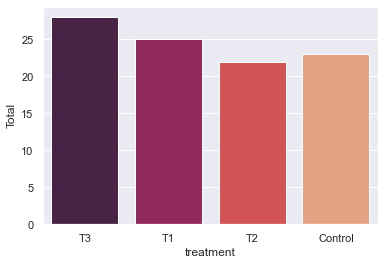

In [234]:
sns.set_theme(style="darkgrid")
sns.countplot(x="treatment", data=df_drug, palette="rocket")
plt.xlabel('treatment')
plt.ylabel('Total')
plt.show()

## 5.5 Market_Cap_Category Distribution based on Sales_Qrt_Category 👫💊

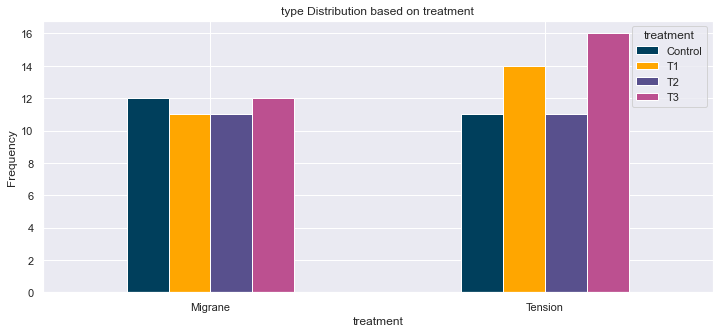

In [235]:
pd.crosstab(df_drug.type,df_drug.treatment).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('type Distribution based on treatment')
plt.xlabel('treatment')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [236]:
df_drug.type.value_counts()

Tension    52
Migrane    46
Name: type, dtype: int64

## 5.7 Mar_Cap_Crore Distribution based on Sales_Qrt_Category and Sales_Qtr_Crore👴

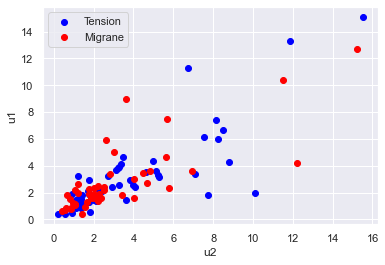

In [237]:
plt.scatter(x=df_drug.u2[df_drug.type=='Tension'], y=df_drug.u1[(df_drug.type=='Tension')], c="Blue")
plt.scatter(x=df_drug.u2[df_drug.type=='Migrane'], y=df_drug.u1[(df_drug.type=='Migrane')], c="Red")
plt.legend(["Tension", "Migrane"])
plt.xlabel("u2")

plt.ylabel("u1")
plt.show()

In [160]:
## 5.7 Mar_Cap_Crore Distribution based on Sales_Qrt_Category and Sales_Qtr_Crore👴

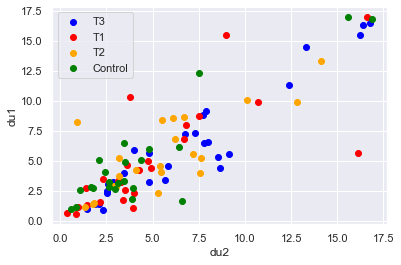

In [238]:
plt.scatter(x=df_drug.du2[df_drug.treatment=='T3'], y=df_drug.du1[(df_drug.treatment=='T3')], c="Blue")
plt.scatter(x=df_drug.du2[df_drug.treatment=='T1'], y=df_drug.du1[(df_drug.treatment=='T1')], c="Red")
plt.scatter(x=df_drug.du2[df_drug.treatment=='T2'], y=df_drug.du1[(df_drug.treatment=='T2')], c="Orange")

plt.scatter(x=df_drug.du2[df_drug.treatment=='Control'], y=df_drug.du1[(df_drug.treatment=='Control')], c="Green")
plt.legend(["T3", "T1","T2","Control"])
plt.xlabel("du2")

plt.ylabel("du1")
plt.show()

In [12]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 459 non-null    object 
 1   Mar_Cap_Crore        459 non-null    float64
 2   Sales_Qtr_Crore      459 non-null    float64
 3   Market_Cap_Category  459 non-null    object 
 4   Sales_Qrt_Category   459 non-null    object 
dtypes: float64(2), object(3)
memory usage: 21.5+ KB
None


In [239]:
df_drug.describe()

Unnamed: 0         u1        du1         u2        du2
count   98.000000  98.000000  98.000000  98.000000  98.000000
mean    49.500000   3.066020   5.522245   3.532245   5.549184
std     28.434134   2.779509   4.235412   3.158358   4.200130
min      1.000000   0.370000   0.530000   0.220000   0.390000
25%     25.250000   1.502500   2.652500   1.377500   2.590000
50%     49.500000   2.195000   4.325000   2.330000   4.050000
75%     73.750000   3.560000   7.120000   4.612500   7.462500
max     98.000000  15.100000  17.000000  15.500000  16.870000

# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

## 6.1 Data Binning 🚮

### 6.1.1Mar_Cap_Crore👴
👉 The age will be divided into **5 age categories**:
*  Below 5000.
*  5000 - 250000 .
*  25000 - 100000.
*  100000 - 250000.
*  Above 250000.

In [258]:
bin_age = [0,1, 2, 3, 16]
category_age = ['<1', '1-2', '2-3', '>3']
df_drug['u1_binned'] = pd.cut(df_drug['u1'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['u1'], axis = 1)


In [259]:
bin_age = [0,2, 4, 7, 17]
category_age = ['<2', '2-4', '4-7', '>7']
df_drug['du1_binned'] = pd.cut(df_drug['du1'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['du1'], axis = 1)


In [260]:
bin_age = [0,1, 2, 4, 16]
category_age = ['<1', '1-2', '2-4', '>4']
df_drug['u2_binned'] = pd.cut(df_drug['u2'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['u2'], axis = 1)


In [261]:
bin_age = [0,2, 4, 7, 17]
category_age = ['<2', '2-4', '4-7', '>7']
df_drug['du2_binned'] = pd.cut(df_drug['du2'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['du2'], axis = 1)



drop name from data because it is not important

In [262]:
df_drug.head()


Unnamed: 0     type treatment u1_binned du1_binned u2_binned du2_binned
0           1  Migrane        T3       2-3        4-7        >4         >7
1           2  Migrane        T1       2-3        4-7        >4        4-7
2           3  Tension        T1        <1         <2        <1         <2
3           4  Migrane        T3        >3         >7        >4         >7
4           5  Migrane        T3        >3         >7        >4        4-7

## 6.2 Splitting the dataset 🪓
👉 The dataset will be split into **80% training and 20% testing**.

In [263]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [264]:
X = df_drug.drop(["treatment"], axis=1)
y = df_drug["treatment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 6.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [265]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [266]:
X_train.head()

Unnamed: 0  type_Migrane  type_Tension  u1_binned_<1  u1_binned_1-2  \
49          50             0             1             0              0   
70          71             1             0             1              0   
68          69             0             1             0              1   
15          16             1             0             0              0   
39          40             0             1             0              1   

    u1_binned_2-3  u1_binned_>3  du1_binned_<2  du1_binned_2-4  \
49              1             0              0               0   
70              0             0              1               0   
68              0             0              0               1   
15              0             1              0               0   
39              0             0              0               1   

    du1_binned_4-7  du1_binned_>7  u2_binned_<1  u2_binned_1-2  u2_binned_2-4  \
49               1              0             0              0              1   
70               0              0             1              0              0   
68               0              0             0              1              0   
15               1              0             0              0              1   
39               0              0             0              1              0   

    u2_binned_>4  du2_binned_<2  du2_binned_2-4  du2_binned_4-7  du2_binned_>7  
49             0              0               0               0              1  
70             0              1               0               0              0  
68             0              0               1               0              0  
15             0              0               0               1              0  
39             0              0               1               0              0

In [267]:
X_test.head()

Unnamed: 0  type_Migrane  type_Tension  u1_binned_<1  u1_binned_1-2  \
62          63             0             1             0              1   
40          41             0             1             0              1   
94          95             0             1             0              0   
18          19             0             1             0              0   
81          82             1             0             0              1   

    u1_binned_2-3  u1_binned_>3  du1_binned_<2  du1_binned_2-4  \
62              0             0              0               0   
40              0             0              1               0   
94              1             0              0               0   
18              0             1              0               0   
81              0             0              0               1   

    du1_binned_4-7  du1_binned_>7  u2_binned_<1  u2_binned_1-2  u2_binned_2-4  \
62               1              0             0              1              0   
40               0              0             0              1              0   
94               1              0             0              0              1   
18               0              1             0              0              0   
81               0              0             1              0              0   

    u2_binned_>4  du2_binned_<2  du2_binned_2-4  du2_binned_4-7  du2_binned_>7  
62             0              0               0               1              0  
40             0              0               1               0              0  
94             0              0               0               1              0  
18             1              0               0               0              1  
81             0              1               0               0              0

In [268]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns

df_drug['type'] = le.fit_transform(df_drug['type'])
df_drug['treatment'] = le.fit_transform(df_drug['treatment'])
df_drug['u1_binned'] = le.fit_transform(df_drug['u1_binned'])
df_drug['u2_binned'] = le.fit_transform(df_drug['u2_binned'])
df_drug['du2_binned'] = le.fit_transform(df_drug['du2_binned'])
df_drug['du1_binned'] = le.fit_transform(df_drug['du1_binned'])
df_drug.head()


Unnamed: 0  type  treatment  u1_binned  du1_binned  u2_binned  du2_binned
0           1     0          3          1           1          3           3
1           2     0          1          1           1          3           1
2           3     1          1          2           2          2           2
3           4     0          3          3           3          3           3
4           5     0          3          3           3          3           1

## save cleaned data

In [275]:
df_drug.to_csv("ca.csv",index=False)

In [276]:
df_drug = pd.read_csv('ca.csv')



            Unnamed: 0      type  treatment  u1_binned  du1_binned  u2_binned  \
Unnamed: 0    1.000000  0.002891  -0.161996  -0.187392   -0.054793  -0.182704   
type          0.002891  1.000000   0.050758   0.113259   -0.031419   0.013188   
treatment    -0.161996  0.050758   1.000000   0.209967    0.141667   0.176178   
u1_binned    -0.187392  0.113259   0.209967   1.000000    0.583246   0.543981   
du1_binned   -0.054793 -0.031419   0.141667   0.583246    1.000000   0.484946   
u2_binned    -0.182704  0.013188   0.176178   0.543981    0.484946   1.000000   
du2_binned   -0.072107  0.023142   0.232546   0.518000    0.551081   0.701775   

            du2_binned  
Unnamed: 0   -0.072107  
type          0.023142  
treatment     0.232546  
u1_binned     0.518000  
du1_binned    0.551081  
u2_binned     0.701775  
du2_binned    1.000000  


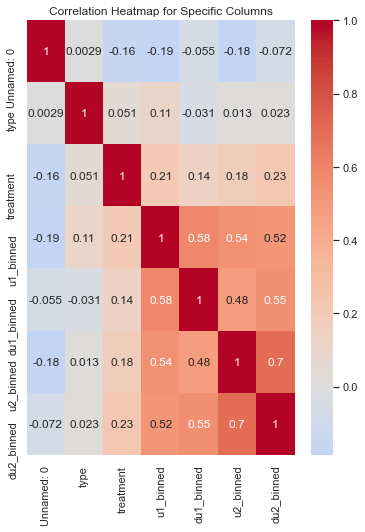

In [277]:
# Calculate correlation matrix for the specific columns
corr_matrix = df_drug.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


# 7. Models 🛠

## 7.1 Logistic Regression

In [279]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=100)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 35.00%


In [280]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 1 0]
 [0 1 4 2]
 [0 0 1 0]
 [2 1 2 4]]


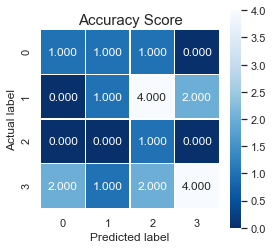

In [281]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

## save model

In [282]:
import joblib
model_filename = 'model_of _data.joblib'
joblib.dump(y_pred, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of _data.joblib


## load and test model

In [283]:
# Load the saved model

model_data = joblib.load(model_filename)
test = model_data.predicted(X_test)
test


AttributeError: 'numpy.ndarray' object has no attribute 'predicted'

## 7.2 K Neighbours

In [284]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=3)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

[[1 1 0 1]
 [4 2 0 1]
 [0 0 1 0]
 [4 4 0 1]]
K Neighbours accuracy is: 25.00%


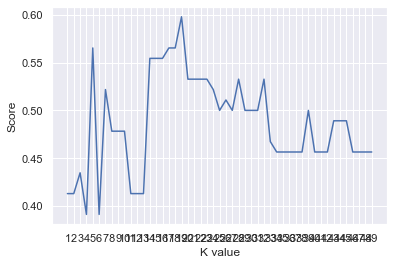

KNN Acc Max 59.78%


In [149]:
scoreListknn = []
for i in range(1,50):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,50), scoreListknn)
plt.xticks(np.arange(1,50,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 7.3 Support Vector Machine (SVM)

In [285]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=50)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

[[2 0 1 0]
 [1 1 5 0]
 [1 0 0 0]
 [2 1 6 0]]
SVC accuracy is: 15.00%


C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


## 7.5 Decision Tree

In [286]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=7)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

[[2 0 1 0]
 [1 1 3 2]
 [0 0 1 0]
 [1 2 3 3]]
Decision Tree accuracy is: 35.00%


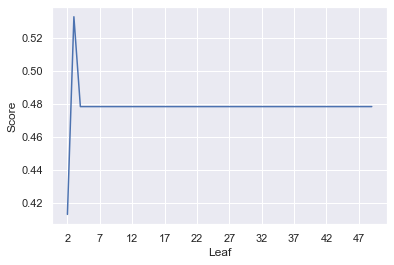

DT Acc Max 53.26%


In [210]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

## 7.6 Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=5)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

[[1 1 1 0]
 [2 1 2 2]
 [0 0 1 0]
 [2 2 1 4]]
Random Forest accuracy is: 35.00%


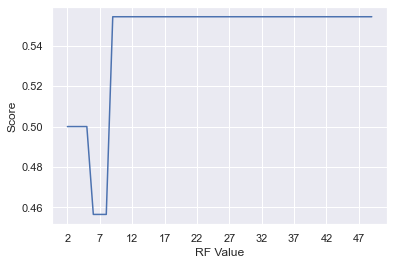

RF Acc Max 55.43%


In [212]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# 8. Model Comparison 👀

In [288]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM','Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

Model   Accuracy
2      K Neighbors Max  59.782609
7    Random Forest Max  55.434783
5    Decision Tree Max  53.260870
0  Logistic Regression  35.000000
4        Decision Tree  35.000000
6        Random Forest  35.000000
1          K Neighbors  25.000000
3                  SVM  15.000000

👉 From the results, it can be seen that most of ML models can reach **up to 60% accuracy** in predicting classification of sales qet.

# 10. References 🔗
📚 **Kaggle Notebook**:
*  [Drug Classification With Different Algorithms by Görkem Günay](https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms)
*  [Drug Classification - 100% Accuracy by Erin Ward](https://www.kaggle.com/eward96/drug-classification-100-accuracy)
*  [drug prediction with acc(100 %) by Sachin Sharma](https://www.kaggle.com/sachinsharma1123/drug-prediction-with-acc-100)